                      Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
                                            
###                 Отчет по лабораторной работе "Решение задачи Коши для обыкновенных дифференциальных уранений"

                                              
                                                 Вариант 10
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                        Выполнил: Михейцев Никита, 430 гр.
                                                        Проверил: Шиндин А. В.

                                         Нижний Новгород, 2016 год.
                                    

###  Содержание
1. Задания
2. Решение системы неявным методом Адамса
3. Точное решение системы и метод Рунге-Кутты
4. Вывод 


###   1. Задания
1. Решить неявным методом Адамса при k = 1 дифференциальное уравнение, построить фазовую траекторию
2. Обеспечить работу программы с системой дифференциальных уравнений первого порядка в режиме «черного ящика» (black box). 

3. Найти точное решение, сравнить найденное решение с точным. 

4. Найти решение с помощью метода Рунге-Кутты кратности 4-5.


###   2. Решение системы неявным методом Адамса
Общий вид задачи Коши:
$$
\begin{cases}
y'(x) & = & f(x,y(x)), \quad x \in (a,b)  \\
y(a)    & = &   y^0
\end{cases} (1)
$$
где  $y (x) \equiv (y1(x), y2(x), . . . , ys(x)), \quad y0 $  - заданный начальный вектор.
 Задачу  (1) приводят к эквивалентному интегральному уравнению:
$$ \begin{eqnarray}
y(x+\varsigma) - y(x) & = &\int_{x}^{x+\varsigma} f(t,y(t)dt \\
 y(a) & = & y^0,
\end{eqnarray}(2)$$

где $x, x+\varsigma$ - произвольные точки интервала [a, b].

Функцию $F(x) \equiv f(x, y(x))$ заменяют интерполяционным многочленом,
принимающим значения $F_n = f(x_n, y_n)$ на множестве точек сетки xn,
в которых должны быть вычислены приближенные значения $y_n$.
Пусть $x_n, x_{n-1}, \cdots , x_{n-k}$ - узлы интерполяции, тогда интерполяционный
многочлен можно записать в форме Лагранжа,
$$ L^k_n (x) = \sum^k_{i=0}p_{ki}(x)F_{n-1}\quad (3)$$
Здесь $p_{ki} (x)$ многочлены Лагранжа.

Подставляя (3) в уравнение (2) для $x = x_n, \varsigma = h$ и выполняя инте-
грирование, получаем схему Адамса-Бешфорта
$$
\begin{cases}
y_{n+1}(x) & = & y_{n} + h\sum^k_{i=0}\beta_{ki}F_{n-i},  \\
y_0(a)    & = &   y^0, n = \overline{0,N-1}, x_n\in\omega_N,
\end{cases} (4)
$$
$$\beta_{ki} \equiv \frac{1}{h} \int^{x_n+h}_{x_n}p_{ki}(t)dt$$

При  $x = x_{n−1}, \varsigma = h$ получим схему Адамса-Мултона
$$
\begin{cases}
y_n(x) & = & y_{n-1} + h\sum^k_{i=0}\beta_{ki}F_{n-i},  \\
y_0(a)    & = &   y^0, n = \overline{0,N-1}, x_n\in\omega_N,
\end{cases} (5)
$$
$$\beta_{ki} \equiv \frac{1}{h} \int^{x_n}_{x_n-h}p_{ki}(t)dt$$

Общая форма записи таких методов:
$$
\sum^k_{j = 0}\alpha_jy_{n+j} = h\sum^k_{j = 0}\beta_jF_{n+j},\quad n = 0,1,\cdots,\quad\quad (6)$$
где $\alpha_j, \beta_j$ - постоянные, $\alpha_n \ne 0, |\alpha_0| + |\beta_0| \ne 0.$
Из (6) имеем
$$y_{n+k} = h\frac{\beta_k}{\alpha_k}f(x_{n+k},y_{n+k}) + g_n ,\quad \beta_k \ne 0\quad\quad (7)$$
где $g_n$ содержит уже известные величины $y_{n+j}, F_{n+j}, j = \overline{0, k - 1}.$ Оказывается, что если
$$hL< abs(\frac{\alpha_k}{\beta_k}),$$

где $L$-постоянная Липшица, то единственное решение нелинейного уравнения (7) можно получить с помощью итерационного процесса
$$y_{n+k}^{\nu+1}=h\frac{\beta_k}{\alpha}f(x_{n+k},y_{n+k}^{\nu})+g_n,\quad \nu = 0,1,\cdots .\quad\quad (8)$$

Величина $y_{n+k}^0$ выбирается произвольно. Итерации (8) проводят до тех пор, пока они не будут
совпадать с заданной точностью.

При k = 1, t = 1 формулу (8) можно записать в виде
$$ y_{n+1} = y_n + \frac{h}{12}(5f(x_{n+1},y_{n+1}^0)+8f(x_n,y_n)-f(x_{n-1},y_{n-1}))
$$

Задача Коши
$$y'''-y''+4y'-4y = \sin{x},\quad y(0)=1,y'(0)=0,y''(0)=0, x\in[0,2]$$

с заданной точностью 0.01

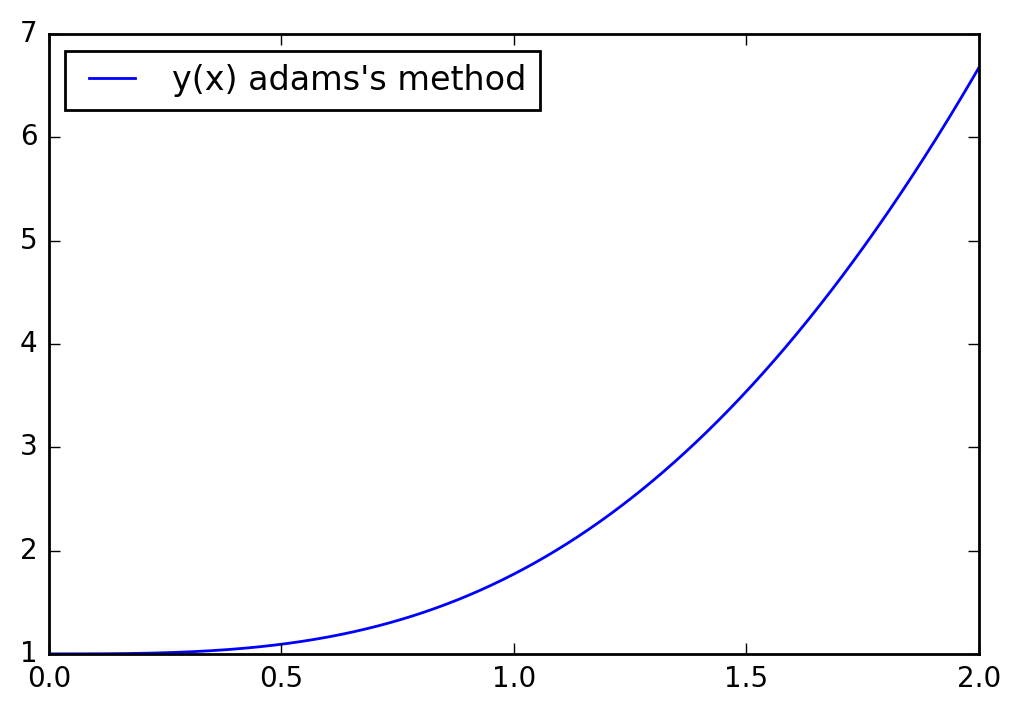

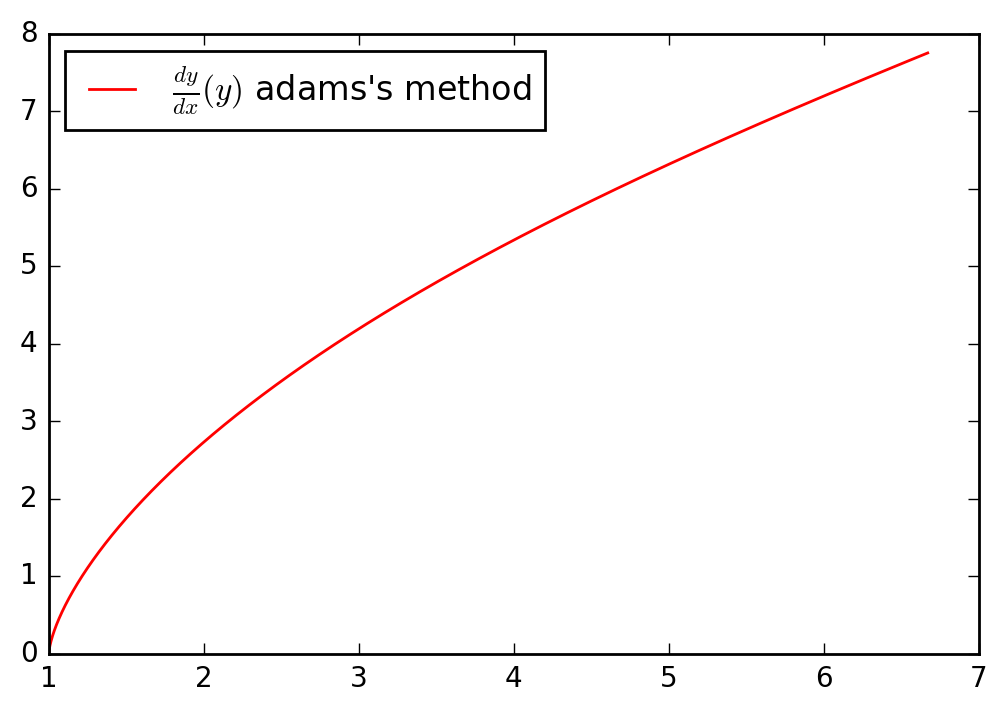

In [25]:
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return [y[1],y[2], 1*y[2] - 4*y[1] + 4*y[0] + np.sin(x)]
    #return [y[1],0.2*(x*np.exp(-x) - 8*y[1] - 4*y[0])]
		
def adams(f,x0,y0,e):

	quantity_of_steps = (x0[1]-x0[0])*5000
	step = (np.fabs(x0[1]-x0[0]))/quantity_of_steps # step
	x = [x0[0] + step*(p) for p in np.arange(0,quantity_of_steps)]
	n = len(y0) #порядок диф. ур-ия
	
	# runge для первых точек
	
	y = np.zeros((n,quantity_of_steps))
	for j in np.arange(0,n):
		y[j,0] = y0[j] # начальные условия
	for i in np.arange(0,2):
		k1,k2,k3,k4 = np.zeros(n),np.zeros(n),np.zeros(n),np.zeros(n)
		k1 = f(x0[0]+step*i,[ y[j][i] for j in range(0,n) ] )
		k2 = f(x0[0]+step*i + step/2,[y[j][i] + step/2 * k1[j] for j in range(0,n)])
		k3 = f(x0[0]+step*i + step/2,[y[j][i] + step/2 * k2[j] for j in range(0,n)])
		k4 = f(x0[0]+step*i + step,[y[j][i] + step * k3[j] for j in range(0,n)])
		for j in range(0,n):
			y[j][i+1] = y[j][i] + step/6*(k1[j] + 2*k2[j] + 2*k3[j] + k4[j] )
			
	y1 = 10000*np.ones((n,quantity_of_steps))
	y2 = np.ones((n,quantity_of_steps))		
	for j in np.arange(0,n):
		y1[j,0] = y0[j]
		y2[j,0] = y0[j]
		y1[j,1] = y[j,1]
		y2[j,1] = y[j,1]
		
	check = 0
	while (np.fabs((y1[0,-1]-y2[0,-1])/y1[0,-1]) > e):
		check +=1
		for i in np.arange(2,quantity_of_steps):
			for j in range(0,n):
				y2[j,i] = y1[j,i]
			for j in range(0,n):
				y1[j,i] = y1[j,i-1] +  step /12 *( 5*f(x0[0]+step*i,y1[:,i])[j] + 8*f(x0[0]+step*(i-1),y1[:,i-1])[j] - f(x0[0]+step*(i-2),y1[:,i-2])[j])
			
	return y1[0,:],y1[1,:]

x = np.linspace(0,2,10000)
y1,dy1 = adams(f,[0,2],[1,0,0],1.e-2)
#print (len(y)-len(y1))
plt.plot(x,y1, label = "y(x) adams's method")
plt.legend(loc = 'best')
plt.show()
plt.plot(y1,dy1, c = 'r',label = r"$\frac{dy}{dx}(y)$ adams's method")
plt.legend(loc = 'best')
plt.show()

### 2. Точное решение системы и метод Рунге-Кутты
#### Точное решение
$$
y(x) = \frac{1}{60}( 54e^{x} - 6\cos{x} +16\cos{2x} - 6\cos{x}\cos{2x} + 2\cos{3x}\cos{2x} -6\sin{x} + 3\cos{2x}\sin{x} - 22\sin{2x} - 3\cos{x}\sin{2x} + \cos{3x}\sin{2x} - 6\sin{x}\sin{2x} -\cos{2x}\sin{3x} + 2\sin{2x}\sin{3x})$$

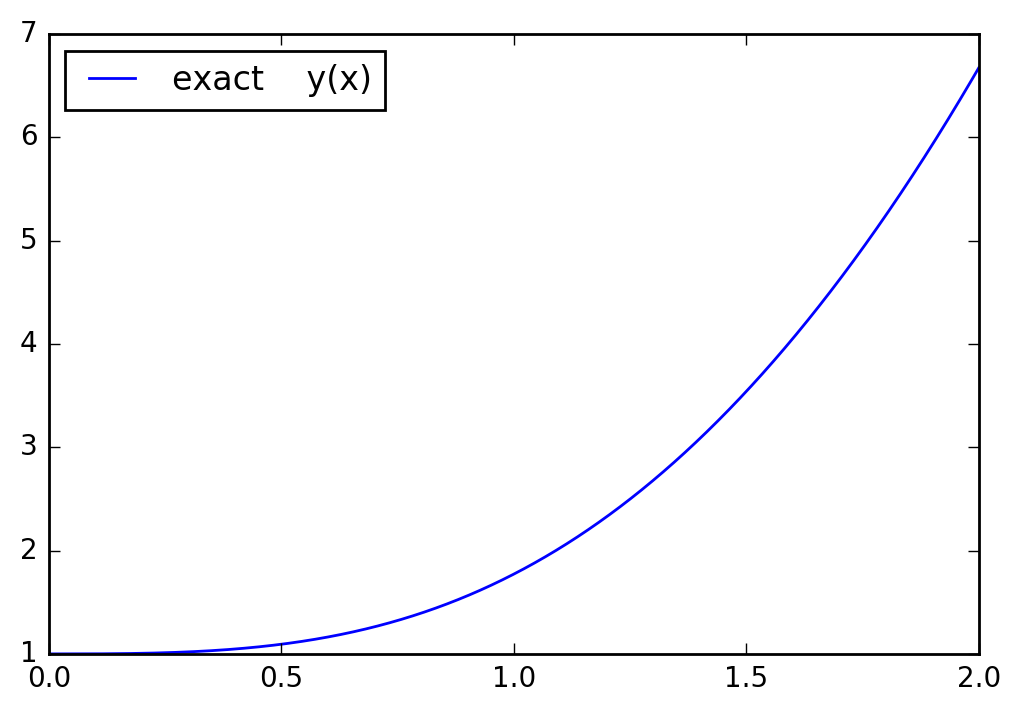

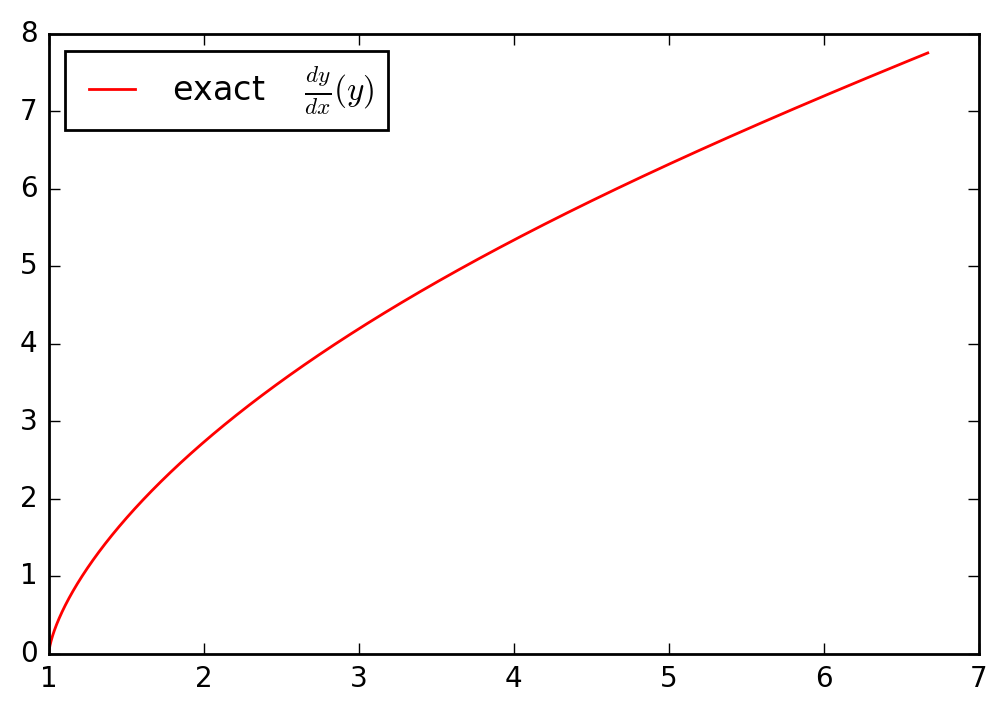

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def exact(x):
	return 1/60*( 54*np.exp(x) - 6*np.cos(x) +16*np.cos(2*x) - 6*np.cos(x)*np.cos(2*x) + 2*np.cos(3*x)*np.cos(2*x) -6*np.sin(x) + 3*np.cos(2*x)*np.sin(x) - 22*np.sin(2*x) - 3*np.cos(x)*np.sin(2*x) + np.cos(3*x)*np.sin(2*x) - 6*np.sin(x)*np.sin(2*x) -np.cos(2*x)*np.sin(3*x) + 2*np.sin(2*x)*np.sin(3*x))
	
x = np.linspace(0,2,10000)
y = [exact(i) for i in x]
plt.plot(x,y, label = 'exact    y(x)')
plt.legend(loc = 'best')
plt.show()
yy = np.zeros(10000)
for i in range(0,10000 - 1):
	yy[i+1] = (y[i+1] - y[i]) / (2/10000)

plt.plot(y[1:],yy[1:], c = 'r',label = r'exact $\quad\frac{dy}{dx}(y)$')
plt.legend(loc = 'best')
plt.show()

#### Метод Рунге-Кутты

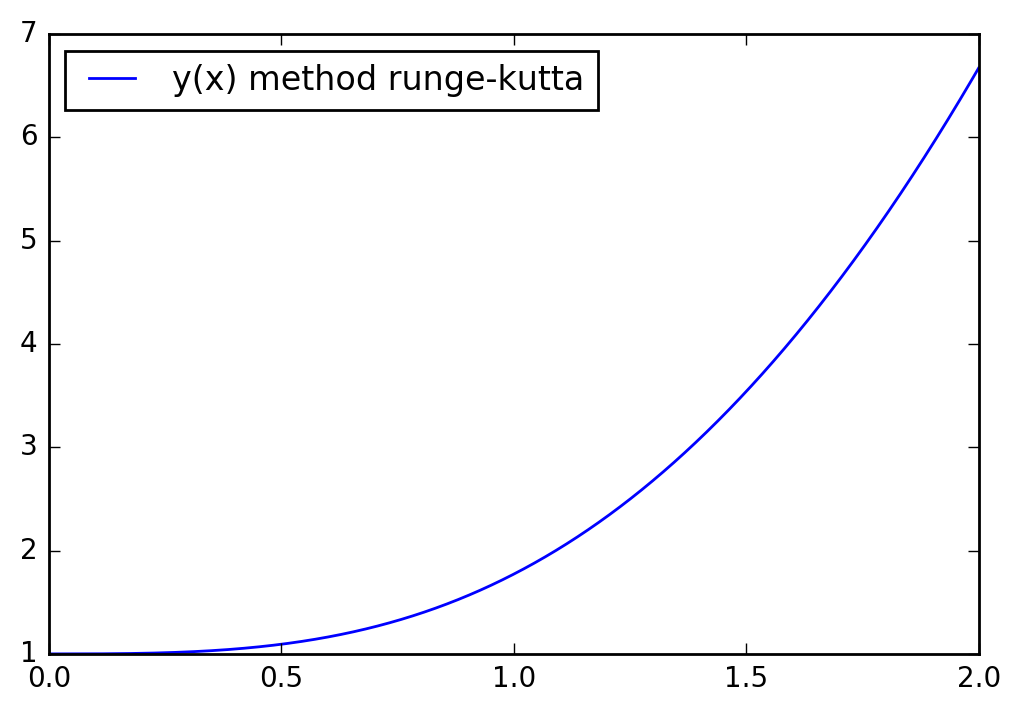

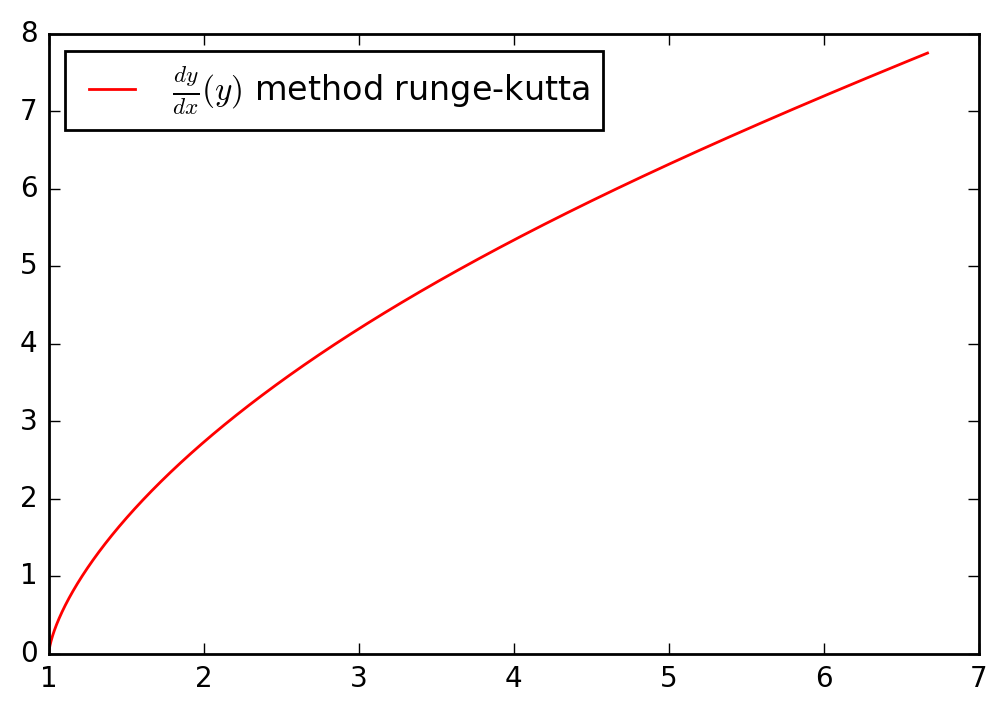

In [27]:
import numpy as np
import matplotlib.pyplot as plt
def f(x,y):
    return [y[1],y[2], y[2] - 4*y[1] +4*y[0]+ np.sin(x)]
    #return [y[1],0.2*(x*np.exp(-x) - 8*y[1] - 4*y[0])]
def runge_kutta_self(f,x0,y0,quantity_of_steps):
    
    step = (x0[1]-x0[0])/quantity_of_steps # step
    x = np.linspace(x0[0],x0[1],step)
    n = len(y0)
    y = np.zeros((n,quantity_of_steps))
    for i in np.arange(0,n-1):
        y[i][0] = y0[i]
        
    for i in np.arange(0,quantity_of_steps-1):
        k1,k2,k3,k4 = np.zeros(n),np.zeros(n),np.zeros(n),np.zeros(n)
        k1 = f(step*i,[ y[j][i] for j in range(0,n) ] )
        k2 = f(step*i + step/2,[y[j][i] + step/2 * k1[j] for j in range(0,n)])
        k3 = f(step*i + step/2,[y[j][i] + step/2 * k2[j] for j in range(0,n)])
        k4 = f(step*i + step,[y[j][i] + step * k3[j] for j in range(0,n)])
        for j in range(0,n):
            y[j][i+1] = y[j][i] + step/6*(k1[j] + 2*k2[j] + 2*k3[j] + k4[j] )         
    
    return y[0,:],y[1,:],step
    
quantity_of_steps = 10000
y2,dy2,step = runge_kutta_self(f,[0,2],[1,0,0],quantity_of_steps)
plt.plot(np.arange(0,quantity_of_steps)*step,y2,label='y(x) method runge-kutta')
plt.legend(loc = 'best')
plt.show()
plt.plot(y2,dy2,c = 'r',label=r'$\frac{dy}{dx}(y)$ method runge-kutta')
plt.legend(loc = 'best')
plt.show()

#### Сравнение

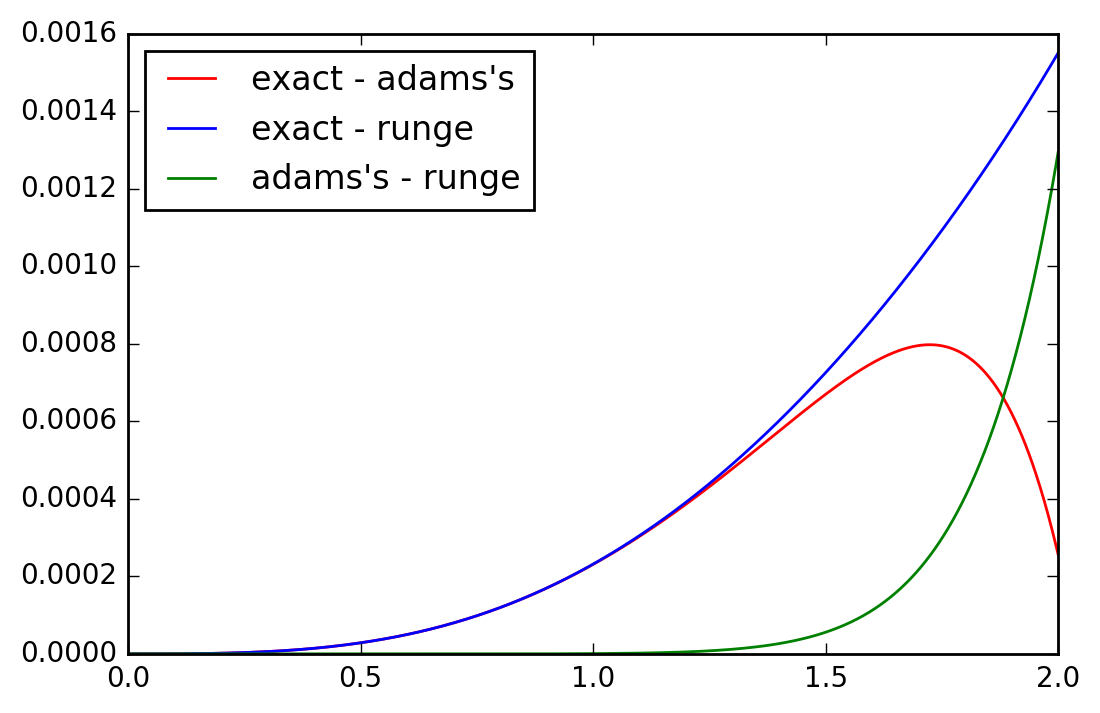

In [33]:
plt.plot(x,np.abs(y-y1), label = "exact - adams's",c = 'r')
plt.plot(x,np.abs(y-y2), label = 'exact - runge',c = 'b')
plt.plot(x,np.abs(y1-y2), label = "adams's - runge",c = 'g')
plt.legend(loc = 'best')
plt.show()

### 4. Вывод
Методы совпали с точным решение с точностью до четвёртого знака после запятой.